# Programa em Python para Descobrir Raíz de uma dada função e plotá-las

In [433]:
import numpy as np
import matplotlib.pyplot as plt

## Define as Funções utilizadas e os Métodos: Bissecção, Newton,etc

In [436]:
# A função f(x) para a qual queremos encontrar o zero
def f(x):
    return x**3 +2*x**2 + 1
    
def encontrar_intervalo(f, ponto_inicial=0, passo=1.5, max_iter=100):
    """
    Busca um intervalo [a, b] para o método da bisseção, priorizando
    a busca por raízes positivas.
    """
    # 1. Tenta encontrar um intervalo positivo
    a = ponto_inicial
    b = ponto_inicial + passo
    for _ in range(max_iter):
        if np.sign(f(a)) * np.sign(f(b)) < 0:
            return a, b
        
        # Expande o intervalo para a direita
        a = b
        b += passo

    # 2. Se a busca positiva falhar, tenta no intervalo negativo
    a = ponto_inicial
    b = ponto_inicial - passo
    for _ in range(max_iter):
        if np.sign(f(a)) * np.sign(f(b)) < 0:
            return a, b
        
        # Expande o intervalo para a esquerda
        a = b
        b -= passo

    print("Não foi possível encontrar um intervalo com sinais opostos dentro do limite de iterações.")
    return None, None


def metodo_bisseccao(f, a, b, tol=1e-6, max_iter=100):
    """
    Implementação do Método da Bisseção.

    Args:
        f (function): A função f(x).
        a (float): O limite inferior do intervalo.
        b (float): O limite superior do intervalo.
        tol (float): A tolerância para a raiz.
        max_iter (int): O número máximo de iterações.

    Returns:
        float: A raiz aproximada.
        list: Uma lista dos pontos médios calculados em cada iteração.
    """
    if np.sign(f(a)) * np.sign(f(b)) >= 0:
        print("O método da bisseção pode não funcionar. A função deve ter sinais opostos nos extremos do intervalo.")
        return None, []

    # Lista para armazenar os pontos médios para visualização
    pontos_medios = []
    
    for i in range(max_iter):
        c = (a + b) / 2.0
        pontos_medios.append(c)
        
        # Se a raiz for encontrada dentro da tolerância
        if np.abs(f(c)) < tol:
            print(f"Raiz encontrada em {c} após {i+1} iterações.")
            return c, pontos_medios
        
        # Atualiza o intervalo
        if np.sign(f(c)) * np.sign(f(a)) < 0:
            b = c
        else:
            a = c
            
    print(f"O método não convergiu após {max_iter} iterações. A última aproximação foi {c}")
    return c, pontos_medios

## Matplotlib: Bissecçao

Intervalo inicial encontrado: [-2.0, -2.5]
Raiz encontrada em -2.205569267272949 após 19 iterações.


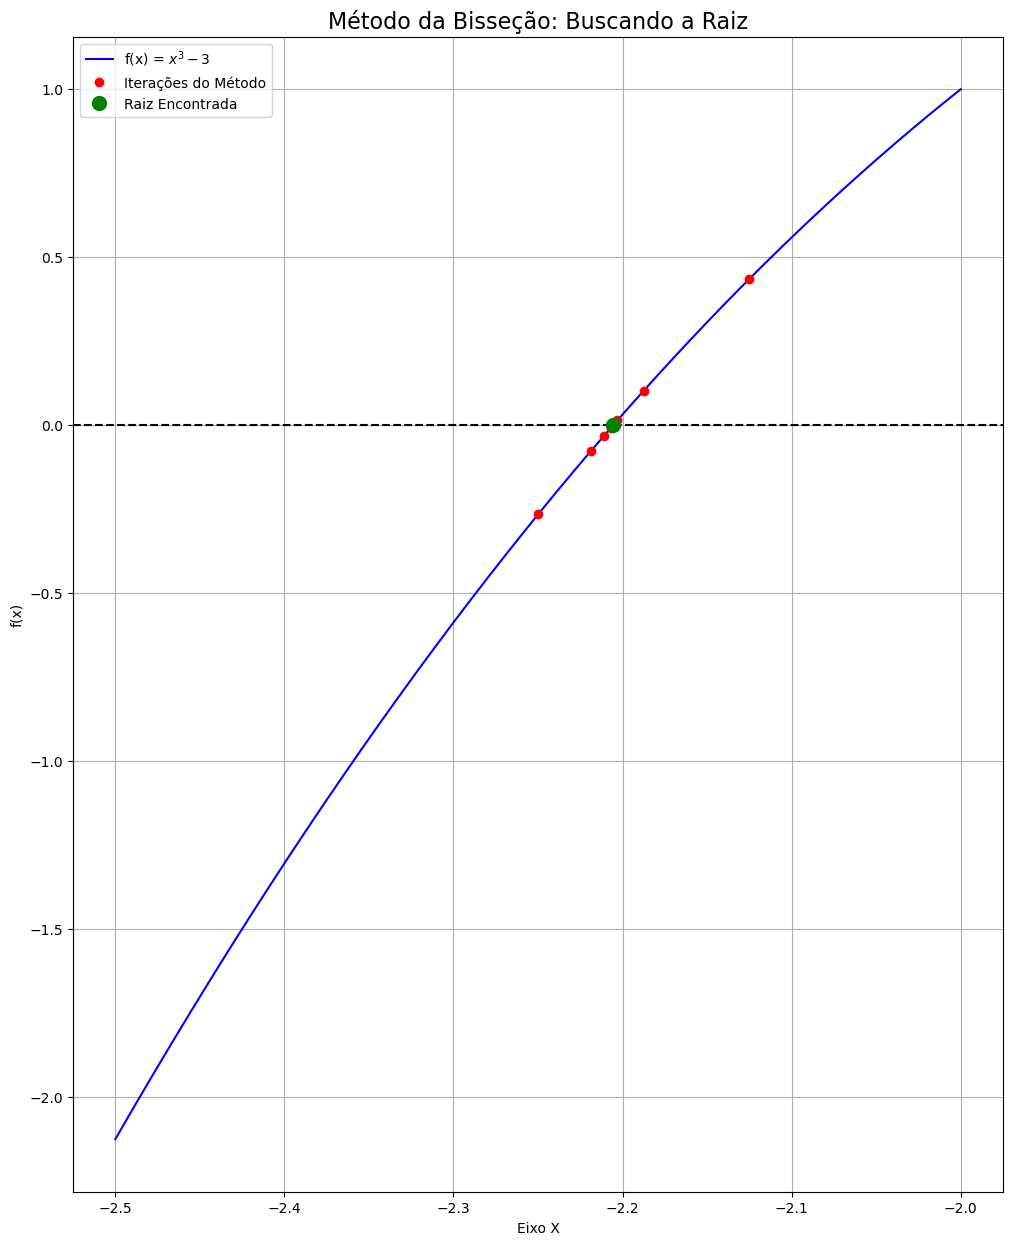

In [439]:

# Definir os parâmetros
tolerancia = 1e-6
max_iteracoes = 100

# Usar a nova função para definir os valores de 'a' e 'b'
a, b = encontrar_intervalo(f, ponto_inicial=1, passo=0.5)

# --- Execução e Visualização ---
if a is not None and b is not None:
    print(f"Intervalo inicial encontrado: [{a}, {b}]")
    raiz, pontos_medios = metodo_bisseccao(f, a, b, tol=tolerancia, max_iter=max_iteracoes)

    if raiz is not None:
        # Gerar pontos para plotar a curva da função
        x_vals = np.linspace(a - 0.5, b + 0.5, 400)
        y_vals = f(x_vals)

        plt.figure(figsize=(12, 15))
        plt.plot(x_vals, y_vals, label='f(x) = $x^3 - 3$', color='blue')
        
        # Adicionar a linha do eixo x (onde f(x) = 0)
        plt.axhline(0, color='black', linestyle='--')
        
        # Plotar os pontos de cada iteração para mostrar a convergência
        plt.plot(pontos_medios, [f(p) for p in pontos_medios],  
                 'ro', label='Iterações do Método')
        
        # Marcar a raiz encontrada
        plt.plot(raiz, f(raiz), 'go', markersize=10, label='Raiz Encontrada')

        plt.title('Método da Bisseção: Buscando a Raiz', fontsize=16)
        plt.xlabel('Eixo X')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()
